# TP House prices

## Récupération des données 

In [1]:
import pandas as pd

In [2]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

Let's get all our columns (one file is enough, they both treat the same datas)

In [3]:
len(df_test.columns)

80

In [4]:
len(df_train.columns)

81

## Exploration

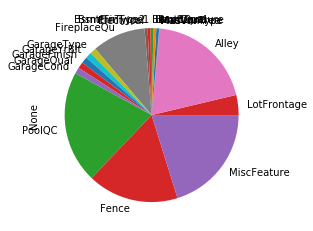

In [5]:
df_train.isnull().sum(axis = 0).plot(kind="pie")

In [6]:
top10 = df_train.corr().abs()["SalePrice"].sort_values(ascending=False)[0:10].index

### Filter

In [7]:
df_train_filter = df_train.filter(items=top10)
df_test_filter = df_test.filter(items=top10)

In [8]:
top10

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea'],
      dtype='object')

In [9]:
import seaborn as sns

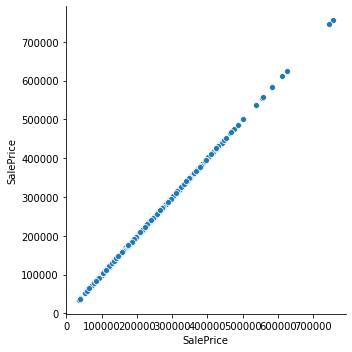

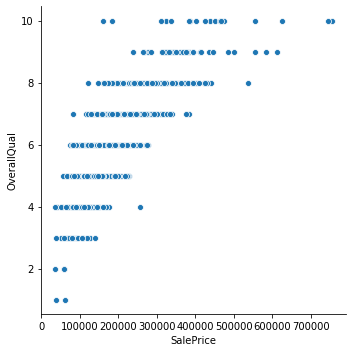

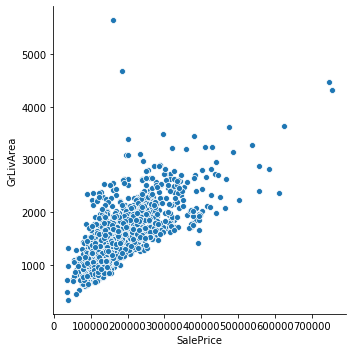

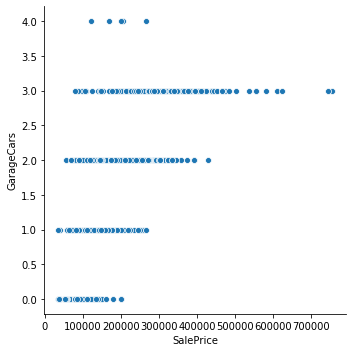

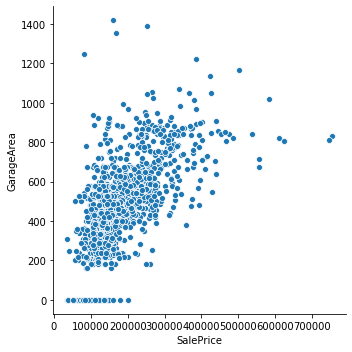

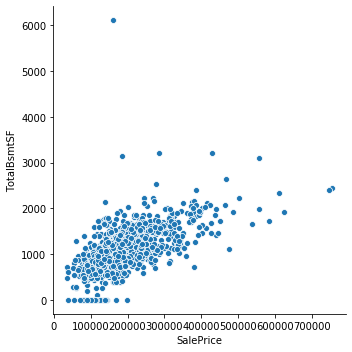

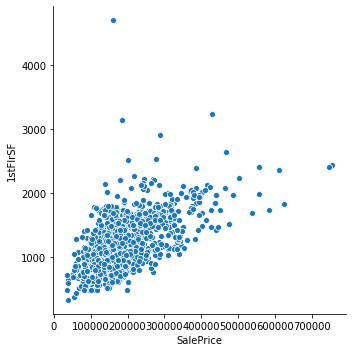

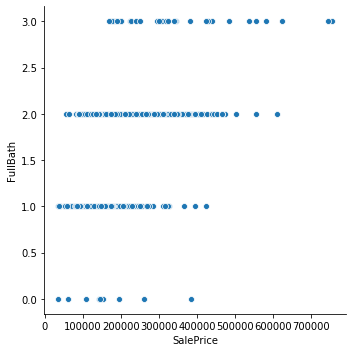

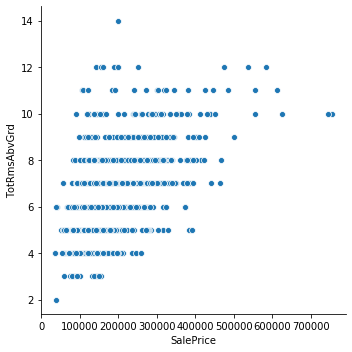

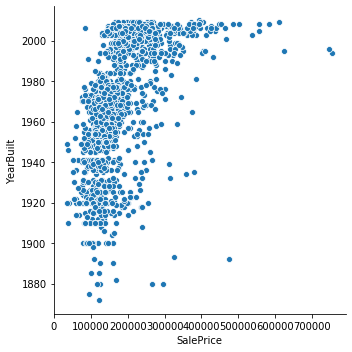

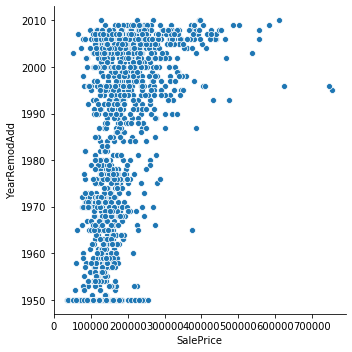

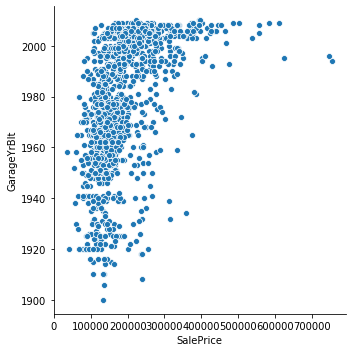

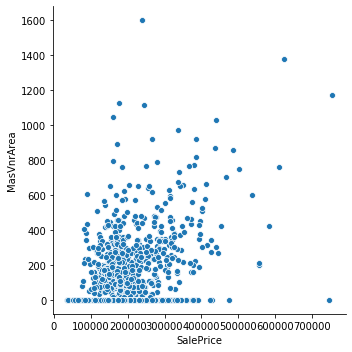

In [10]:
for col in top10:
    sns.relplot(x="SalePrice", y=col, data=df_train_filter)

## Data Cleaning

In [11]:
df_train_filter.isna().sum(axis = 0)

SalePrice        0
OverallQual      0
GrLivArea        0
GarageCars       0
GarageArea       0
TotalBsmtSF      0
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [12]:
columns_nan = df_test_filter.isna().sum(axis = 0)

In [13]:
columns_nan = columns_nan[columns_nan >0].index

### Supression des nans 

In [14]:
for nan_column in columns_nan:
    df_test_filter[nan_column].fillna((df_test_filter[nan_column].mean()), inplace=True)

## Modeling 

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [16]:
y = df_train_filter["SalePrice"]

In [17]:
X = df_train_filter.drop(["SalePrice"], axis=1)

Random Forest

In [18]:
regr = RandomForestRegressor(random_state=0, n_estimators=300, max_features=8)
regr.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Liner Regression

In [ ]:
estimator = LinearRegression()

In [ ]:
estimator.fit(X, y)

In [ ]:
y_pred = regr.predict(df_test_filter)

In [ ]:
y_pred

In [ ]:
df_result = pd.concat([df_test["Id"], pd.Series(y_pred)], axis=1)
df_result.columns = ["Id", "SalePrice"]

In [ ]:
df_result.to_csv("result_V4.2.csv", sep="," ,index=False )

## Hypothèses

In [ ]:
1) Ajouter de nouvelles données
2) Warning : Numériser les données => scikit learn label encoder / one hot encoder
3) Warning : Attention Nan ( une autre méthode que moyenne ? )
4) Identifier et/ou supprimer données aberrantes
5) Standardiser les données : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
6)Model : tester de nouveaux modèles , optimiser les hypermparametres  (randomsearch, gridsearch)
7) CrossValidaton